In [1]:
import pandas as pd
import anal_preprocess as ap
pd.set_option('display.max_columns', None)
df = pd.read_csv('./student-mat.csv')
df['grade'] = df['G1'].values + df['G2'].values + df['G3'].values 
input_data = df.drop(columns=['grade'])

In [2]:
dp = ap.DataProcess(input_data, df)
dp.shapiro()
dp.extract_numeric_categoy_cols()
numeric_data = dp.nemeric_check_cols()
dp.numeric_correlation_cols
dp.category_preprocess()
category_data, ctg_data = dp.category_tranformed_numeric()

ShapiroResult(statistic=0.9926792337421895, pvalue=0.05052375511183993)
본 결측치 체크는 연속형 변수에 대하여 진행합니다.
결측치 데이터 컬럼 없음!
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
이상치를 결측치로 대체한 후 KNN 방식으로 대체 ... 2차결측치 검증 진행
본 결측치 체크는 연속형 변수에 대하여 진행합니다.
결측치 데이터 컬럼 : 6개, ['age', 'traveltime', 'studytime', 'failures', 'Dalc', 'absences'] 
age            1
Medu           0
Fedu           0
traveltime     8
studytime     27
failures      83
famrel         0
freetime       0
goout          0
Dalc          18
Walc           0
health         0
absences      15
G1             0
G2             0
G3             0
dtype: int64
KNN 알고리즘 대체
결측치 대체 후 검정 결측치 컬럼갯수 : 0 
본 결측치 체크는 연속형 변수에 대하여 진행합니다.
결측치 데이터 컬럼 : 4개, ['guardian_encd', 'Mjob_encd', 'reason_encd', 'Fjob_encd'] 
guardian_encd    2
Mjob_encd        2
reason_encd      3
Fjob_encd        3
dtype: int64
KNN 알고리즘 대체
결측치

In [11]:
catg = ctg_data.columns
ori_catg = input_data.columns
intersection_catg = catg.intersection(ori_catg)
len(intersection_catg)

17

Index(['famsup', 'schoolsup', 'guardian', 'sex', 'Mjob', 'Pstatus', 'reason',
       'paid', 'higher', 'famsize', 'school', 'address', 'Fjob', 'nursery',
       'internet', 'romantic', 'activities'],
      dtype='object')

In [17]:
catg_subplot = ctg_data[intersection_catg]
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
catg_subplot.head()

,famsup,schoolsup,guardian,sex,Mjob,Pstatus,reason,paid,higher,famsize,school,address,Fjob,nursery,internet,romantic,activities
0,no,yes,mother,F,at_home,A,course,no,yes,GT3,GP,U,teacher,yes,no,no,no
1,yes,no,mother,F,at_home,T,course,no,yes,GT3,GP,U,other,no,yes,no,no
2,no,yes,mother,F,at_home,T,home,yes,yes,LE3,GP,U,other,yes,yes,no,no
3,yes,no,mother,F,health,T,home,yes,yes,GT3,GP,U,other,yes,yes,yes,yes
4,yes,no,father,F,other,T,home,yes,yes,GT3,GP,U,other,yes,no,no,no


In [26]:
# 0과 1에 대한 바차트
'''
fig, axes = plt.subplots(2,9, figsize=(20,14))
for i in range(9):
    sns.barplot(catg_subplot.index, catg_subplot.iloc[:,i], ax=axes[0][i])
    axes[0][i].set_title(catg_subplot.columns[i])
for i in range(9):
    sns.barplot(catg_subplot.index, catg_subplot.iloc[:,i+9], ax=axes[1][i])
    axes[1][i].set_title(catg_subplot.columns[i+9])
'''

'\nfig, axes = plt.subplots(2,9, figsize=(20,14))\nfor i in range(9):\n    sns.barplot(catg_subplot.index, catg_subplot.iloc[:,i], ax=axes[0][i])\n    axes[0][i].set_title(catg_subplot.columns[i])\nfor i in range(9):\n    sns.barplot(catg_subplot.index, catg_subplot.iloc[:,i+9], ax=axes[1][i])\n    axes[1][i].set_title(catg_subplot.columns[i+9])\n'

In [30]:
intersection_catg[i]

'famsup'

IndexError: index 17 is out of bounds for axis 0 with size 17

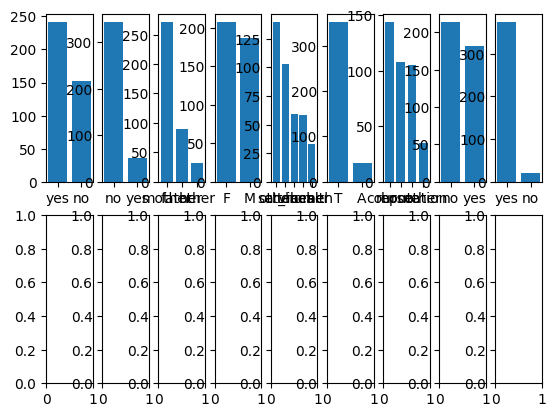

In [33]:
# 일반 바차트
fig, axs = plt.subplots(2,9)
for i in range(9):
    axs[0][i].bar(df[intersection_catg[i]].value_counts().index, df[intersection_catg[i]].value_counts())
for j in range(9):
    if j < 8:
        axs[1][i].bar(df[intersection_catg[i+9]].value_counts().index, df[intersection_catg[i+9]].value_counts())
    else:
        pass

In [6]:
# 1차결측치 검증
ncs_cat = utils_null.NullCheckSubstitution(null_catg_df)
null_cat_df_check = ncs_cat.null_check()
null_cat_df_check = null_cat_df_check.round(0)
# knn 대체 기준 값으로 기존 'null_check' 대응하는 기존 값을 삭제하고 기준 값으로 대체한다.
for col in null_cols_encd:
    cat_df[col] = null_cat_df_check[col].values
    trf_cat_df[col] = null_cat_df_check[col].values
# 매칭을 통해서 범주형을 채운다.
length = len(null_cols_encd)
for i in range(length):
    cat_df[null_cols[i]] = cat_df[null_cols_encd[i]].map(ls_zip[i])

NameError: name 'utils_null' is not defined

In [ ]:
catgory_df_completed = trf_cat_df.round(0)

In [ ]:
all_numeric_trf_df = pd.concat([numeric_df_completed, catgory_df_completed], axis=1)
all_numeric_trf_df